In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import json

## Figure 1: Average Download speeds over time

In [10]:
df = pd.read_csv("speed_data/Average download speeds over time.csv")
df['dtime per 30 days'] = pd.to_datetime(df['dtime per 30 days'], format='%Y-%m-%d')

# Convert time series with index Month
# df.index = df['dtime per 30 days']
# x_dates = df['dtime per 30 days']
# del df['dtime per 30 days']
df.head()

,dtime per 30 days,Download speed (Mbps)
0,2011-01-26,13.300
1,2011-02-25,12.831
2,2011-03-27,12.796
3,2011-04-26,13.007
4,2011-05-26,13.172


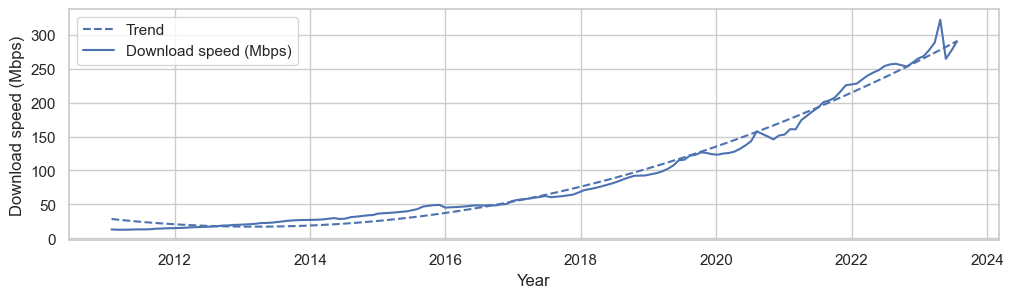

In [11]:
plt.figure(figsize=(12,3))
sns.set_theme(style="whitegrid")

x_dates = df["dtime per 30 days"]
x_num = dates.date2num(x_dates)
y = df['Download speed (Mbps)']
idx = np.isfinite(y) & np.isfinite(x_num)

# Calculate fit line
trend = np.polyfit(x_num[idx], y[idx], 2)
fit = np.poly1d(trend)

# Not really necessary to convert the values back into dates
#but added as a demonstration in case one wants to plot non-linear curves
x_fit = np.linspace(x_num.min(), x_num.max())
sns.set_theme(style="whitegrid")
plt.plot(dates.num2date(x_fit), fit(x_fit), "b--", label="Trend")
plt.plot(x_dates, y, label="Download speed (Mbps)")
plt.ylabel('Download speed (Mbps)')
plt.xlabel('Year')
# plt.title('Median of Idle Latency (rtt_max) Measurements Per Month (2011 - 2023)')
plt.legend(loc="best")
plt.xlabel('Year')

# And show
plt.show()

## Figure 2: Average Upload speeds over time

In [12]:
df = pd.read_csv("speed_data/Average upload speeds over time.csv")
df['dtime per 30 days'] = pd.to_datetime(df['dtime per 30 days'], format='%Y-%m-%d')

# Convert time series with index Month
# df.index = df['dtime per 30 days']
# x_dates = df['dtime per 30 days']
# del df['dtime per 30 days']
df.head()

,dtime per 30 days,Upload speed (Mbps)
0,2011-01-26,3.254
1,2011-02-25,2.983
2,2011-03-27,3.022
3,2011-04-26,3.111
4,2011-05-26,3.174


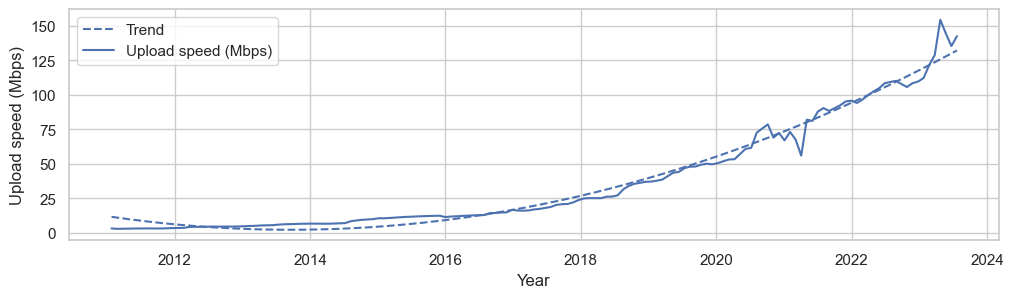

In [13]:
plt.figure(figsize=(12,3))
sns.set_theme(style="whitegrid")

x_dates = df["dtime per 30 days"]
x_num = dates.date2num(x_dates)
y = df['Upload speed (Mbps)']
idx = np.isfinite(y) & np.isfinite(x_num)

# Calculate fit line
trend = np.polyfit(x_num[idx], y[idx], 2)
fit = np.poly1d(trend)

# Not really necessary to convert the values back into dates
#but added as a demonstration in case one wants to plot non-linear curves
x_fit = np.linspace(x_num.min(), x_num.max())
sns.set_theme(style="whitegrid")
plt.plot(dates.num2date(x_fit), fit(x_fit), "b--", label="Trend")
plt.plot(x_dates, y, label="Upload speed (Mbps)")
plt.ylabel('Upload speed (Mbps)')
plt.xlabel('Year')
# plt.title('Median of Idle Latency (rtt_max) Measurements Per Month (2011 - 2023)')
plt.legend(loc="best")
plt.xlabel('Year')

# And show
plt.show()

## Figure 3: Average Download speed by technology

In [31]:
df = pd.read_csv("speed_data/Average download speeds over time - by technology.csv")
df['dtime per 30 days'] = pd.to_datetime(df['dtime per 30 days'], format='%Y-%m-%d')
df.head()

,Top 3 values of operator_technology,dtime per 30 days,Download speed (Mbps)
0,Cable,2011-01-26,15.919
1,Cable,2011-02-25,15.674
2,Cable,2011-03-27,15.770
3,Cable,2011-04-26,15.922
4,Cable,2011-05-26,16.012


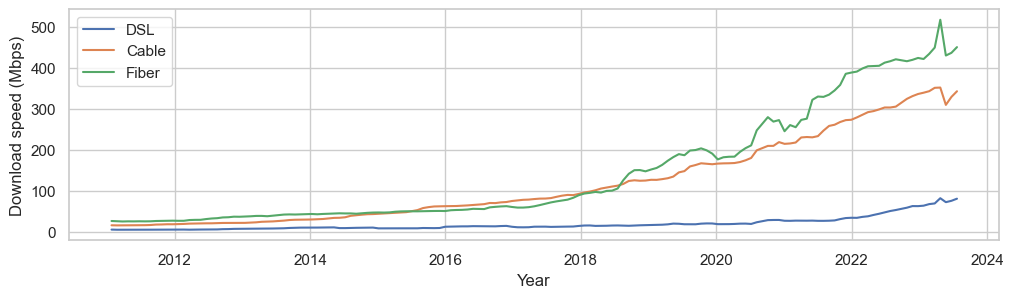

In [32]:
# General plot again
plt.figure(figsize=(12,3))
sns.set_theme(style="whitegrid")

for tech in ["DSL", "Cable", "Fiber"]:
    temp_df = df[df["Top 3 values of operator_technology"] == tech]
    x_dates = temp_df["dtime per 30 days"]
    x_num = dates.date2num(x_dates)
    y = temp_df['Download speed (Mbps)']
    idx = np.isfinite(y) & np.isfinite(x_num)
    x_fit = np.linspace(x_num.min(), x_num.max())

    # Calculate fit line
    # trend = np.polyfit(x_num[idx], y[idx], 2)
    # fit = np.poly1d(trend)


    # plt.plot(dates.num2date(x_fit), fit(x_fit), "r--", label=f"{tech} Trend")
    plt.plot(x_dates, y, label=f"{tech}")

plt.ylabel('Download speed (Mbps)')
plt.xlabel('Year')
# plt.title(f"Median of Idle Latency Measurements Per Month by Technology (2011 – 2023)")
plt.legend(loc="best")
# And show
plt.show()

In [33]:
def plot_median_by_tech(tech):
    temp_df = df[df["Top 3 values of operator_technology"] == tech]
    x_dates = temp_df["dtime per 30 days"]
    x_num = dates.date2num(x_dates)
    y = temp_df['Download speed (Mbps)']
    idx = np.isfinite(y) & np.isfinite(x_num)

    # Calculate fit line
    trend = np.polyfit(x_num[idx], y[idx], 2)
    fit = np.poly1d(trend)

    # General plot again
    plt.figure(figsize=(12,3))

    x_fit = np.linspace(x_num.min(), x_num.max())
    sns.set_theme(style="whitegrid")
    plt.plot(dates.num2date(x_fit), fit(x_fit), "b--", label="Trend")
    plt.plot(x_dates, y, label="Download speed (Mbps)")
    plt.ylabel('Download speed (Mbps)')
    plt.xlabel('Year')
    plt.title(f"Average of Download speed (Mbps) Per Month (2011 - 2023) for {tech}")
    plt.legend(loc="best")
    plt.xlabel('Year')

    # And show
    plt.show()

### Cable

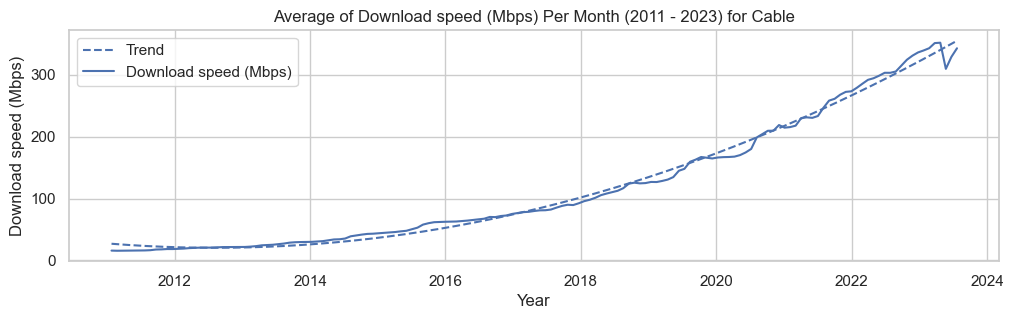

In [34]:
plot_median_by_tech("Cable")

### Fiber

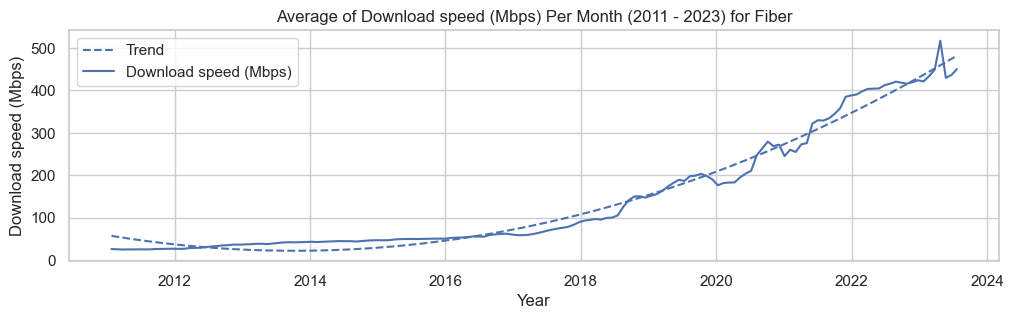

In [35]:
plot_median_by_tech("Fiber")

### DSL

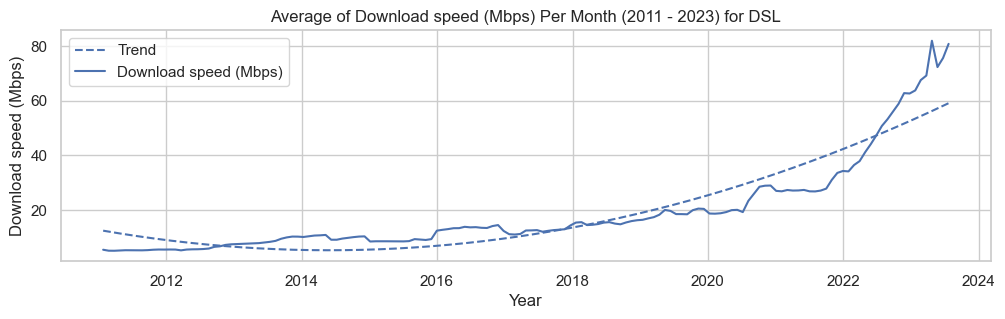

In [36]:
plot_median_by_tech("DSL")

## Figure 4: Average Upload speed by technology

In [37]:
df = pd.read_csv("speed_data/Average upload speeds over time - by technology.csv")
df['dtime per 30 days'] = pd.to_datetime(df['dtime per 30 days'], format='%Y-%m-%d')
df.head()

,Top 3 values of operator_technology,dtime per 30 days,Upload speed (Mbps)
0,Cable,2011-01-26,2.280
1,Cable,2011-02-25,2.155
2,Cable,2011-03-27,2.175
3,Cable,2011-04-26,2.254
4,Cable,2011-05-26,2.294


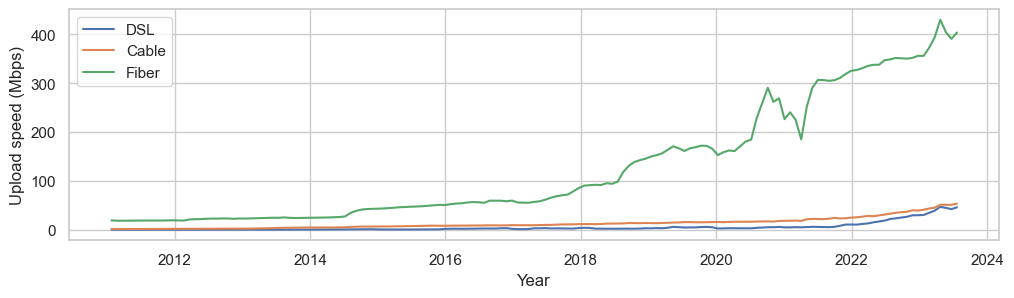

In [38]:
# General plot again
plt.figure(figsize=(12,3))
sns.set_theme(style="whitegrid")

for tech in ["DSL", "Cable", "Fiber"]:
    temp_df = df[df["Top 3 values of operator_technology"] == tech]
    x_dates = temp_df["dtime per 30 days"]
    x_num = dates.date2num(x_dates)
    y = temp_df['Upload speed (Mbps)']
    idx = np.isfinite(y) & np.isfinite(x_num)
    x_fit = np.linspace(x_num.min(), x_num.max())

    # Calculate fit line
    # trend = np.polyfit(x_num[idx], y[idx], 2)
    # fit = np.poly1d(trend)


    # plt.plot(dates.num2date(x_fit), fit(x_fit), "r--", label=f"{tech} Trend")
    plt.plot(x_dates, y, label=f"{tech}")

plt.ylabel('Upload speed (Mbps)')
plt.xlabel('Year')
# plt.title(f"Median of Idle Latency Measurements Per Month by Technology (2011 – 2023)")
plt.legend(loc="best")
# And show
plt.show()

In [39]:
def plot_median_by_tech(tech):
    temp_df = df[df["Top 3 values of operator_technology"] == tech]
    x_dates = temp_df["dtime per 30 days"]
    x_num = dates.date2num(x_dates)
    y = temp_df['Upload speed (Mbps)']
    idx = np.isfinite(y) & np.isfinite(x_num)

    # Calculate fit line
    trend = np.polyfit(x_num[idx], y[idx], 2)
    fit = np.poly1d(trend)

    # General plot again
    plt.figure(figsize=(12,3))

    x_fit = np.linspace(x_num.min(), x_num.max())
    sns.set_theme(style="whitegrid")
    plt.plot(dates.num2date(x_fit), fit(x_fit), "b--", label="Trend")
    plt.plot(x_dates, y, label="Upload speed (Mbps)")
    plt.ylabel('Upload speed (Mbps)')
    plt.xlabel('Year')
    plt.title(f"Average of Upload speed (Mbps) Per Month (2011 - 2023) for {tech}")
    plt.legend(loc="best")
    plt.xlabel('Year')

    # And show
    plt.show()

### Cable

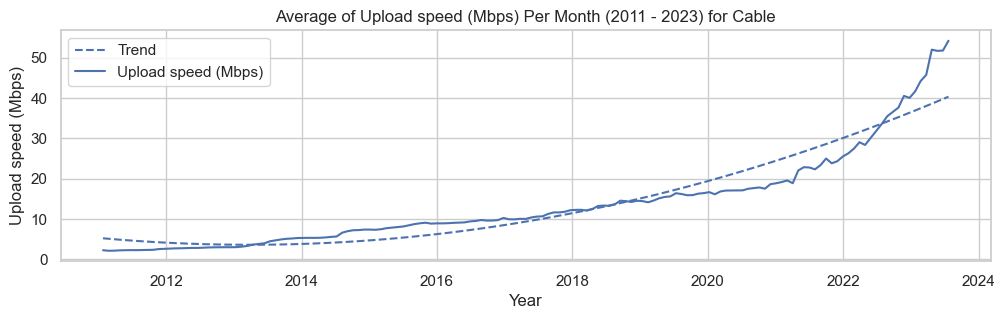

In [40]:
plot_median_by_tech("Cable")

### Fiber

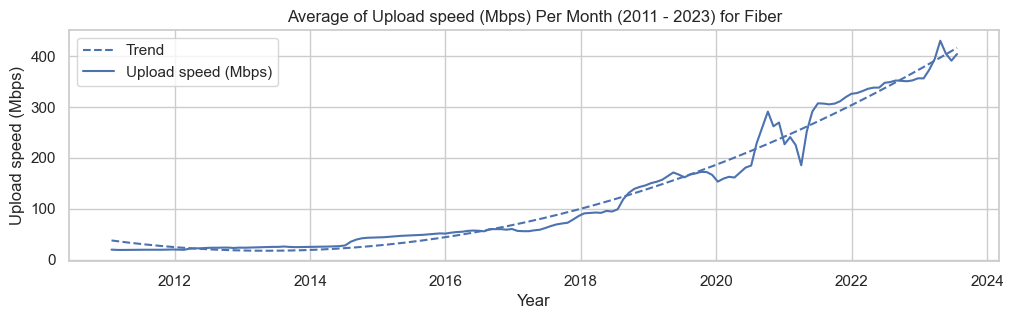

In [41]:
plot_median_by_tech("Fiber")

### DSL

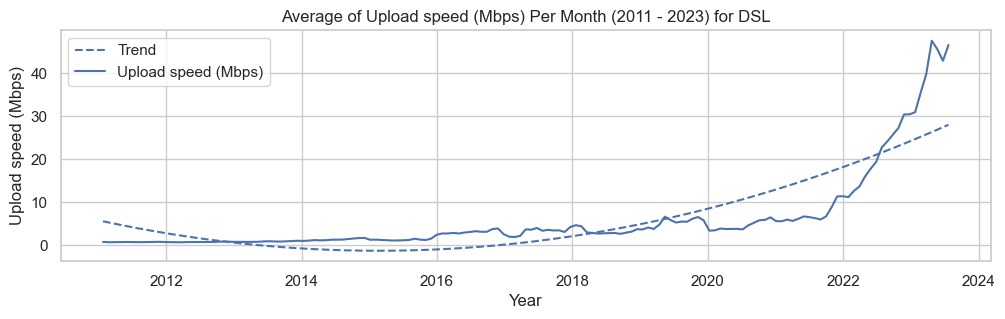

In [42]:
plot_median_by_tech("DSL")